In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
import splitfolders
splitfolders.ratio('dataset', output="split", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3076 files [00:08, 349.82 files/s]


In [4]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/test'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:

  # useful for getting number of output classes
folders = glob('split/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)


In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,161,191 (84.54 MB)

 Trainable params: 358,407 (1.37 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2457 images belonging to 7 classes.


In [14]:
test_set = test_datagen.flow_from_directory('split/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=78,
  validation_steps=9
)

Epoch 1/40


C:\Users\KIIT\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/78 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3325 - loss: 11.2031

C:\Users\KIIT\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.3335 - loss: 11.1493 - val_accuracy: 0.5799 - val_loss: 2.5856
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.5855 - loss: 2.6059 - val_accuracy: 0.4074 - val_loss: 1.6359
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5635 - loss: 3.3944 - val_accuracy: 0.5556 - val_loss: 3.1304
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.6542 - loss: 2.0650 - val_accuracy: 0.5556 - val_loss: 4.2356
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6436 - loss: 2.6534 - val_accuracy: 0.6076 - val_loss: 3.1775
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7389 - loss: 1.5692 - val_accuracy: 0.5556 - val_loss: 1.9622
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7098 - loss: 1.8188 - val_accuracy: 0.5972 - val_loss: 4.3791
Epoch 8/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7306 - loss: 1.9027 - val_accuracy: 0.7407 - val_loss: 1

In [16]:
import matplotlib.pyplot as plt


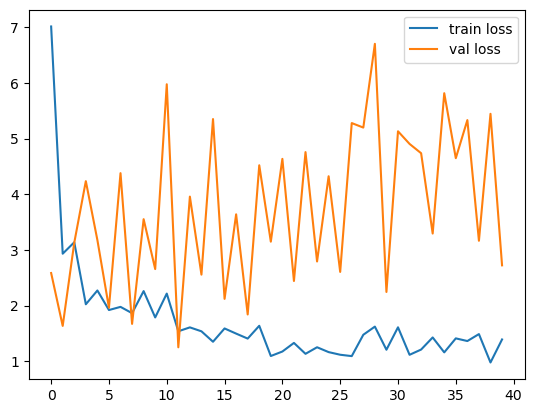

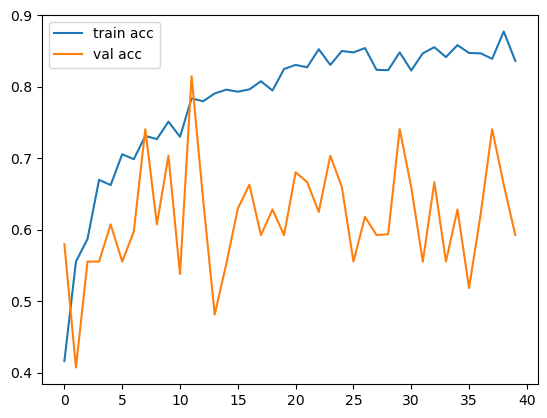

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model_inception(3).h5')

In [19]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


In [20]:
y_pred

array([[1.0000000e+00, 2.2931904e-24, 0.0000000e+00, ..., 1.7784857e-18,
        1.0689274e-12, 1.0631379e-25],
       [3.6566811e-20, 1.5928653e-07, 4.1906301e-20, ..., 6.5138671e-12,
        1.5368883e-15, 9.9999988e-01],
       [2.3061709e-14, 1.0094839e-07, 1.3225608e-10, ..., 2.0612080e-01,
        3.5093562e-21, 7.9387915e-01],
       ...,
       [3.2612855e-30, 1.6847167e-18, 6.0986007e-16, ..., 1.0000000e+00,
        8.0418360e-27, 3.0890349e-12],
       [2.3480304e-13, 8.3495063e-01, 1.2365484e-10, ..., 5.0865834e-05,
        4.8683330e-07, 2.7866259e-10],
       [4.1505645e-38, 8.8092646e-23, 7.4316157e-11, ..., 1.0000000e+00,
        6.8287037e-23, 3.7245103e-12]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 6, 6, 0, 5, 2, 1, 6, 0, 4, 0, 4, 0, 1, 6, 0, 2, 0, 0, 5, 4, 0,
       1, 4, 4, 6, 4, 5, 4, 0, 4, 4, 2, 2, 1, 4, 1, 2, 0, 1, 4, 4, 4, 5,
       1, 4, 4, 4, 1, 5, 5, 6, 5, 1, 0, 4, 0, 6, 0, 4, 4, 0, 1, 4, 0, 4,
       4, 4, 1, 2, 1, 4, 1, 4, 0, 5, 4, 4, 0, 2, 4, 2, 6, 4, 4, 0, 1, 1,
       0, 5, 0, 5, 1, 3, 5, 5, 1, 5, 2, 0, 0, 6, 6, 2, 4, 1, 1, 0, 0, 1,
       0, 4, 1, 5, 0, 5, 2, 2, 6, 5, 6, 3, 4, 4, 1, 6, 4, 6, 1, 2, 4, 4,
       3, 2, 2, 6, 4, 4, 2, 6, 6, 1, 4, 4, 4, 5, 0, 4, 5, 4, 4, 1, 1, 5,
       4, 6, 0, 6, 6, 0, 6, 6, 1, 4, 6, 2, 4, 1, 0, 5, 6, 2, 0, 4, 0, 5,
       0, 6, 2, 6, 6, 6, 0, 5, 4, 4, 6, 6, 4, 0, 3, 5, 5, 4, 0, 4, 4, 0,
       4, 4, 4, 4, 1, 5, 4, 2, 1, 0, 4, 6, 4, 0, 0, 0, 0, 1, 4, 4, 4, 2,
       1, 4, 6, 5, 2, 5, 4, 5, 4, 4, 6, 0, 0, 2, 6, 4, 0, 0, 0, 4, 6, 1,
       0, 6, 2, 3, 2, 2, 0, 0, 1, 0, 4, 5, 1, 4, 4, 4, 1, 4, 0, 1, 5, 5,
       1, 5, 1, 5, 0, 4, 1, 4, 6, 1, 5, 2, 2, 4, 4, 6, 4, 1, 5, 4, 2, 2,
       0, 2, 6, 0, 6, 6, 4, 6, 1, 6, 4, 2, 4, 5, 6,